In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Joint Continent Statistics

In [192]:
NGO_continent_2015 = pd.read_csv("2015_NGO_continent_stats.csv", index_col=0)
IGO_continent_2015 = pd.read_csv("2015_IGO_continent_stats.csv", index_col=0)
NGO_continent_2017 = pd.read_csv("2017_NGO_continent_stats.csv", index_col=0)
IGO_continent_2017 = pd.read_csv("2017_IGO_continent_stats.csv", index_col=0)
NGO_continent_2019 = pd.read_csv("2019_NGO_continent_stats.csv", index_col=0)
IGO_continent_2019 = pd.read_csv("2019_IGO_continent_stats.csv", index_col=0)
NGO_continent_2021 = pd.read_csv("2021_NGO_continent_stats.csv", index_col=0)
IGO_continent_2021 = pd.read_csv("2021_IGO_continent_stats.csv", index_col=0)

In [51]:
dfs = [NGO_continent_2015, IGO_continent_2015, NGO_continent_2017, IGO_continent_2017, 
      NGO_continent_2019, IGO_continent_2019, NGO_continent_2021, IGO_continent_2021]

for df in dfs:
    S = sum(list(df.Count))
    df["Perc_total"] = df["Count"]/S * 100

In [53]:
NGO_continent_2015

,Continent,Count,Perc_total
0,North America,289,26.808905
1,Europe,478,44.341373
2,Asia,161,14.935065
3,Oceania,31,2.875696
4,South America,61,5.658627
5,Africa,58,5.380334


In [54]:
sum(list(NGO_continent_2015.Perc_total))

100.0

## 1. Side-by-side Piecharts

### a. NGOs

In [42]:
NGO_continent_2015

,Continent,Count
0,North America,289
1,Europe,478
2,Asia,161
3,Oceania,31
4,South America,61
5,Africa,58


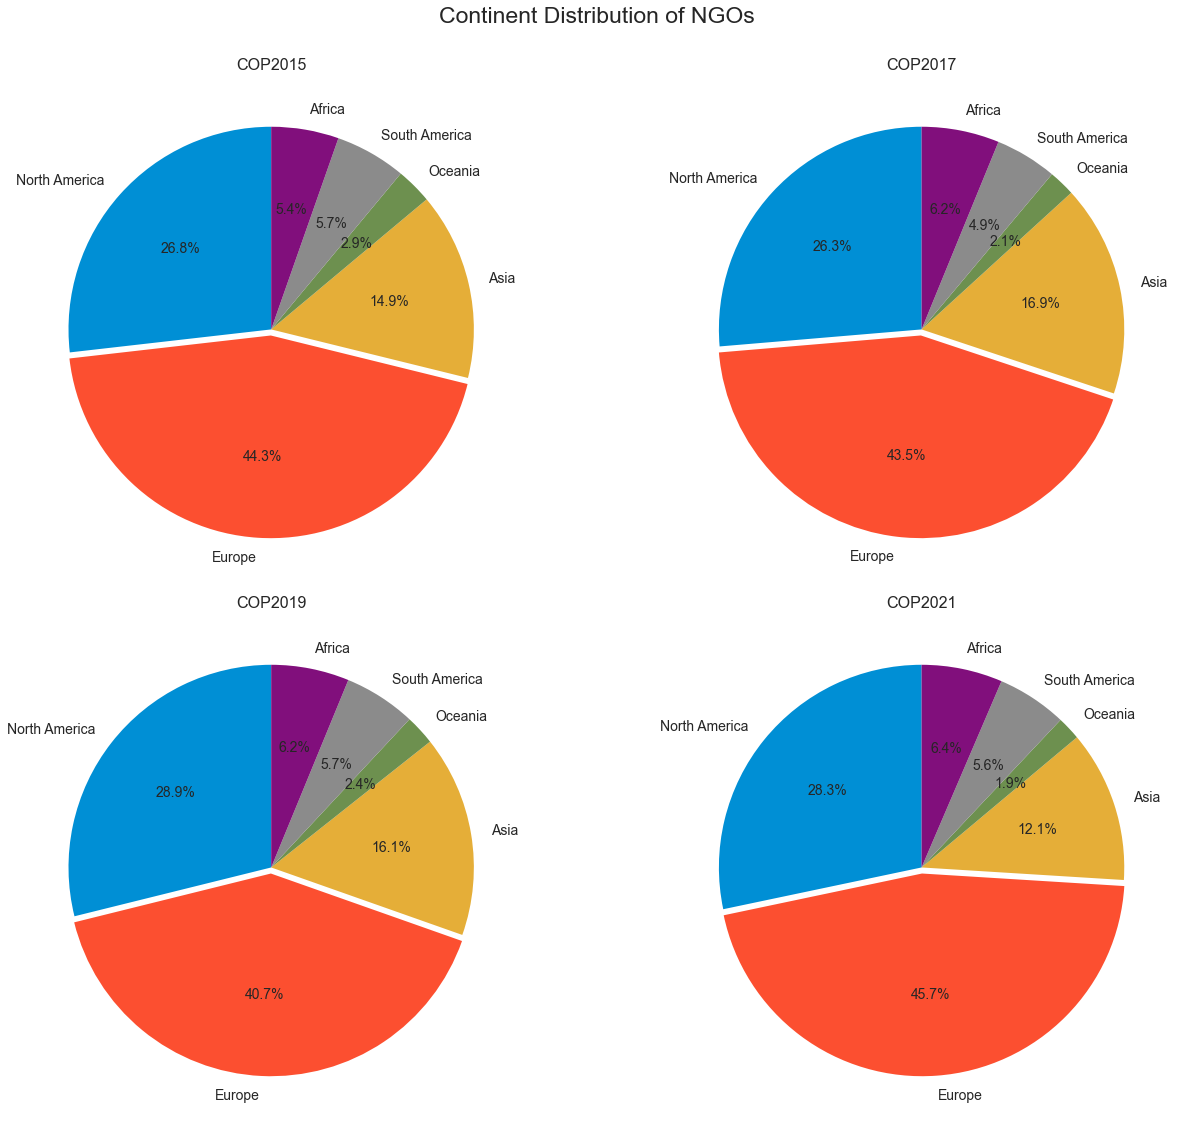

In [96]:
plt.figure(figsize=(20,16))
# COP 2015
plt.subplot(2, 2, 1)
plt.pie(NGO_continent_2015.Count,
        labels=NGO_continent_2015.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2015', fontsize = 16)
# plt.axis('equal')

# COP 2017
plt.subplot(2, 2, 2)
plt.pie(NGO_continent_2017.Count,
        labels=NGO_continent_2017.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2017', fontsize = 16)
# plt.axis('equal')

# COP 2019
plt.subplot(2, 2, 3)
plt.pie(NGO_continent_2019.Count,
        labels=NGO_continent_2019.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2019', fontsize = 16)
# plt.axis('equal')

# COP 2021
plt.subplot(2, 2, 4)
plt.pie(NGO_continent_2021.Count,
        labels=NGO_continent_2021.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2021', fontsize = 16)
# plt.axis('equal')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Continent Distribution of NGOs', fontsize=23)
plt.savefig('NGO_continent_pie.png', facecolor = "white", dpi = 350)

### b. IGOs

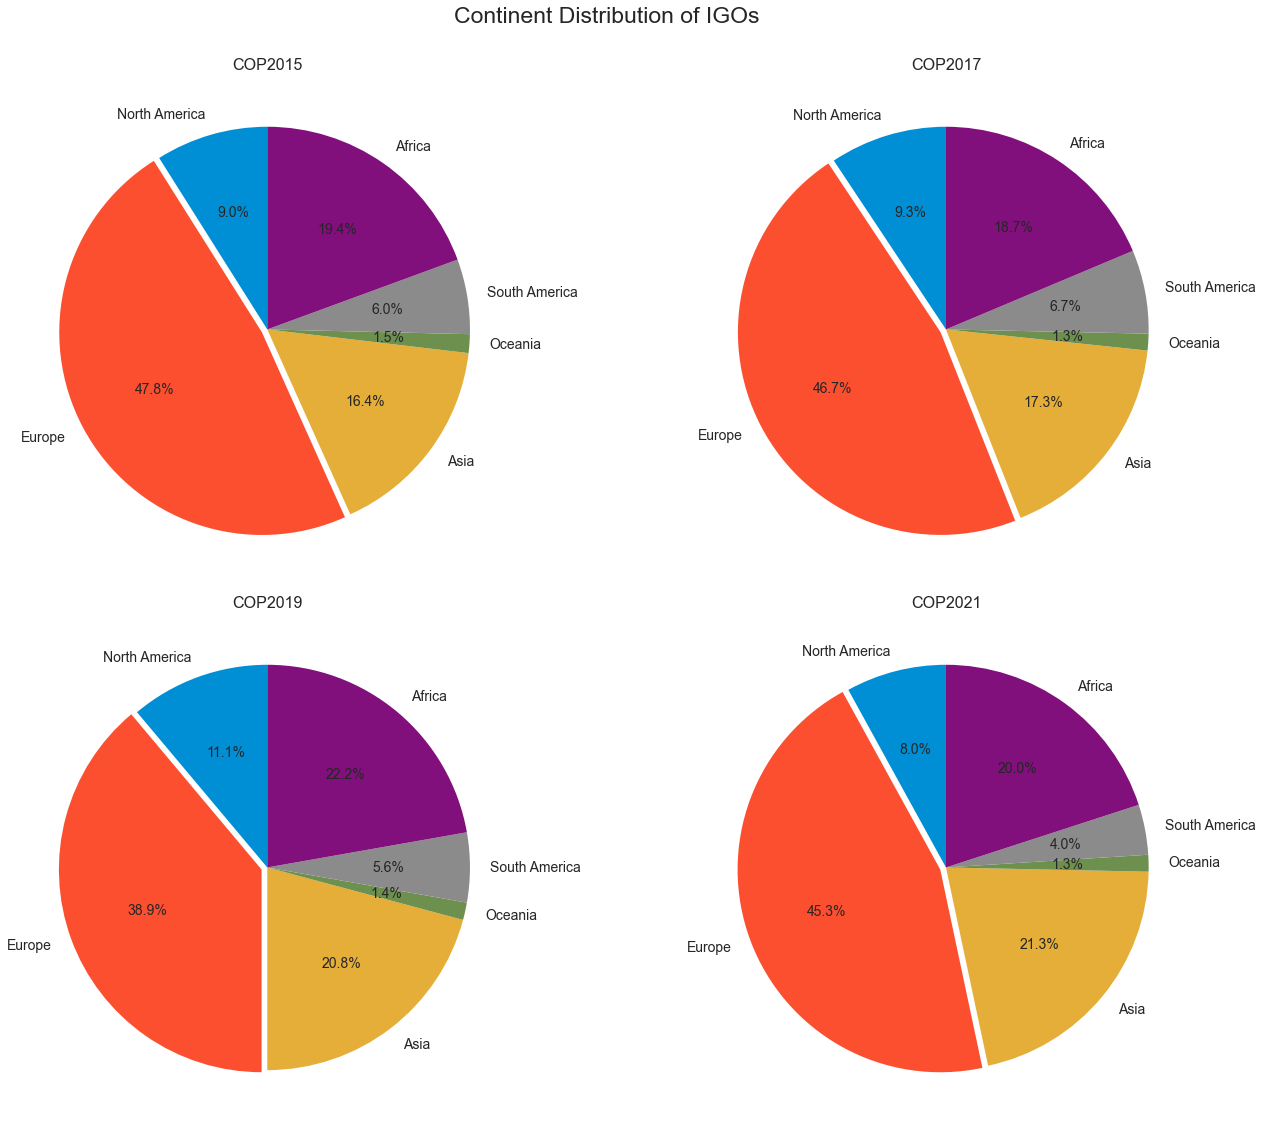

In [193]:
plt.figure(figsize=(20,16))
# COP 2015
plt.subplot(2, 2, 1)
plt.pie(IGO_continent_2015.Count,
        labels=IGO_continent_2015.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2015', fontsize = 16)
# plt.axis('equal')

# COP 2017
plt.subplot(2, 2, 2)
plt.pie(IGO_continent_2017.Count,
        labels=IGO_continent_2017.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2017', fontsize = 16)
# plt.axis('equal')

# COP 2019
plt.subplot(2, 2, 3)
plt.pie(IGO_continent_2019.Count,
        labels=IGO_continent_2019.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2019', fontsize = 16)
# plt.axis('equal')

# COP 2021
plt.subplot(2, 2, 4)
plt.pie(IGO_continent_2021.Count,
        labels=IGO_continent_2021.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('COP2021', fontsize = 16)
# plt.axis('equal')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Continent Distribution of IGOs', fontsize=23)
plt.savefig('IGO_continent_pie.png', facecolor = "white", dpi = 350)

## 2. Barcharts (unstacked + stacked)

In [90]:
def refactor_dfs_perc(dfs):
    init = pd.DataFrame(columns=["North America", "Europe", "Asia", "Oceania", "South America", "Africa"])
    for i in range(len(dfs)):
        df = dfs[i]
        a = df[["Continent", "Count"]].copy().T
        a.reset_index(drop = True, inplace=True)
        a.columns = a.iloc[0,:]
        a = a.drop(labels=0, axis=0)
        a.reset_index(drop = True, inplace=True)
        a["Conference"] = [f"COP{2015+2*i}"]
        init = init.append(a, ignore_index=True)
    
    return init

## NGOs

In [ ]:
ngo_cont_breakdown = refactor_dfs_perc([NGO_continent_2015, NGO_continent_2017, NGO_continent_2019, NGO_continent_2021])

In [1]:
plt.style.use('seaborn-white')
ax = ngo_cont_breakdown.plot(x='Conference',
        kind='barh',
        stacked=False,
        title='NGO Continent Count', figsize = (20,15))
plt.gca().invert_yaxis()

plt.savefig('NGO_continent_barh1.png', facecolor = "white", dpi = 350)

NameError: name 'plt' is not defined

## IGOs

In [194]:
igo_cont_breakdown = refactor_dfs_perc([IGO_continent_2015, IGO_continent_2017, IGO_continent_2019, IGO_continent_2021])

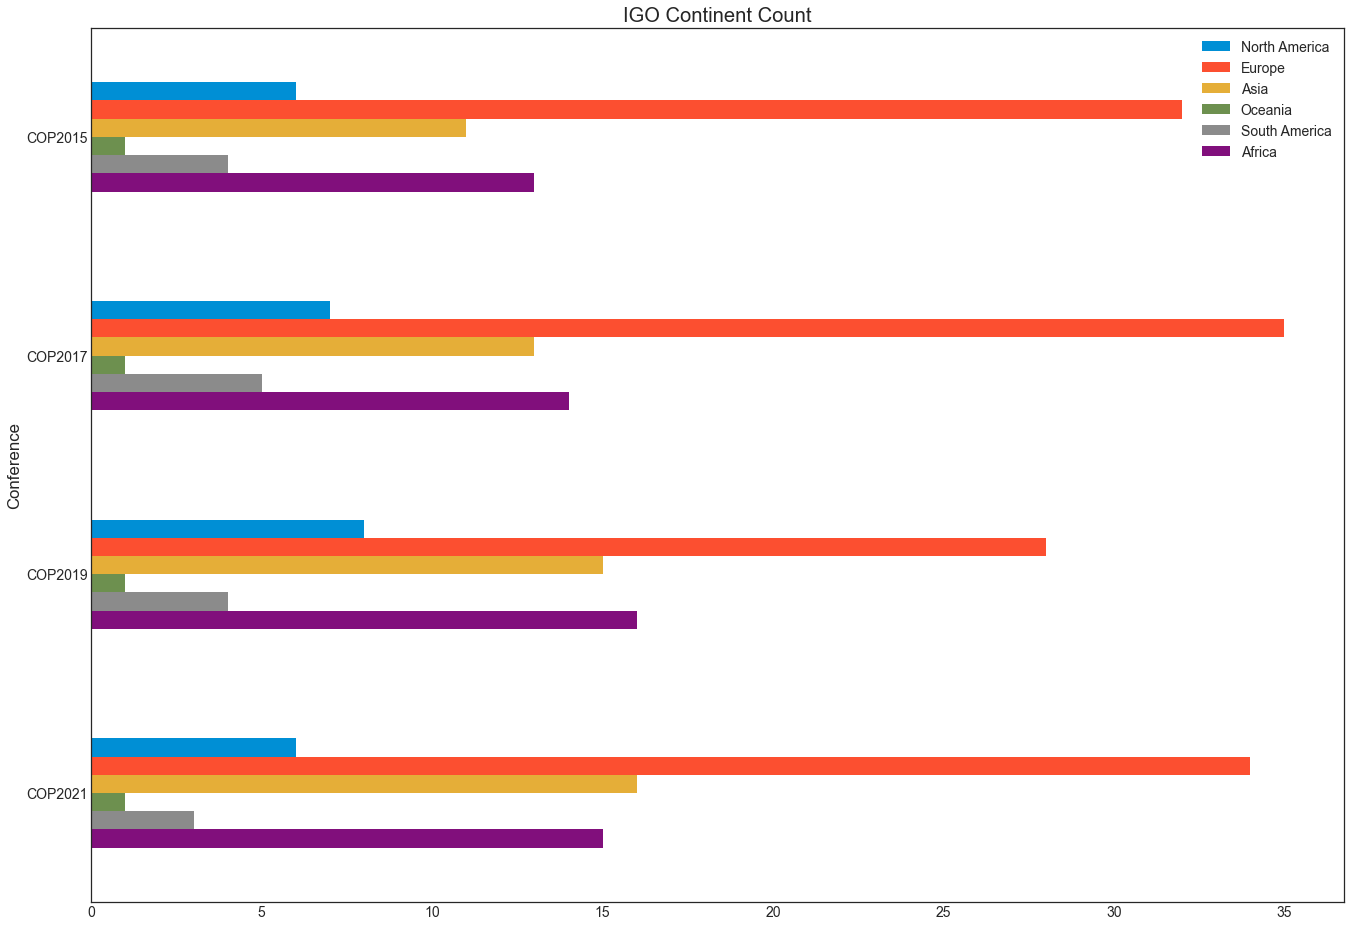

In [195]:
ax = igo_cont_breakdown.plot(x='Conference',
        kind='barh',
        stacked=False,
        title='IGO Continent Count', figsize = (20,15))
plt.gca().invert_yaxis()

plt.savefig('IGO_continent_barh1.png', facecolor = "white", dpi = 350)

## NGOs

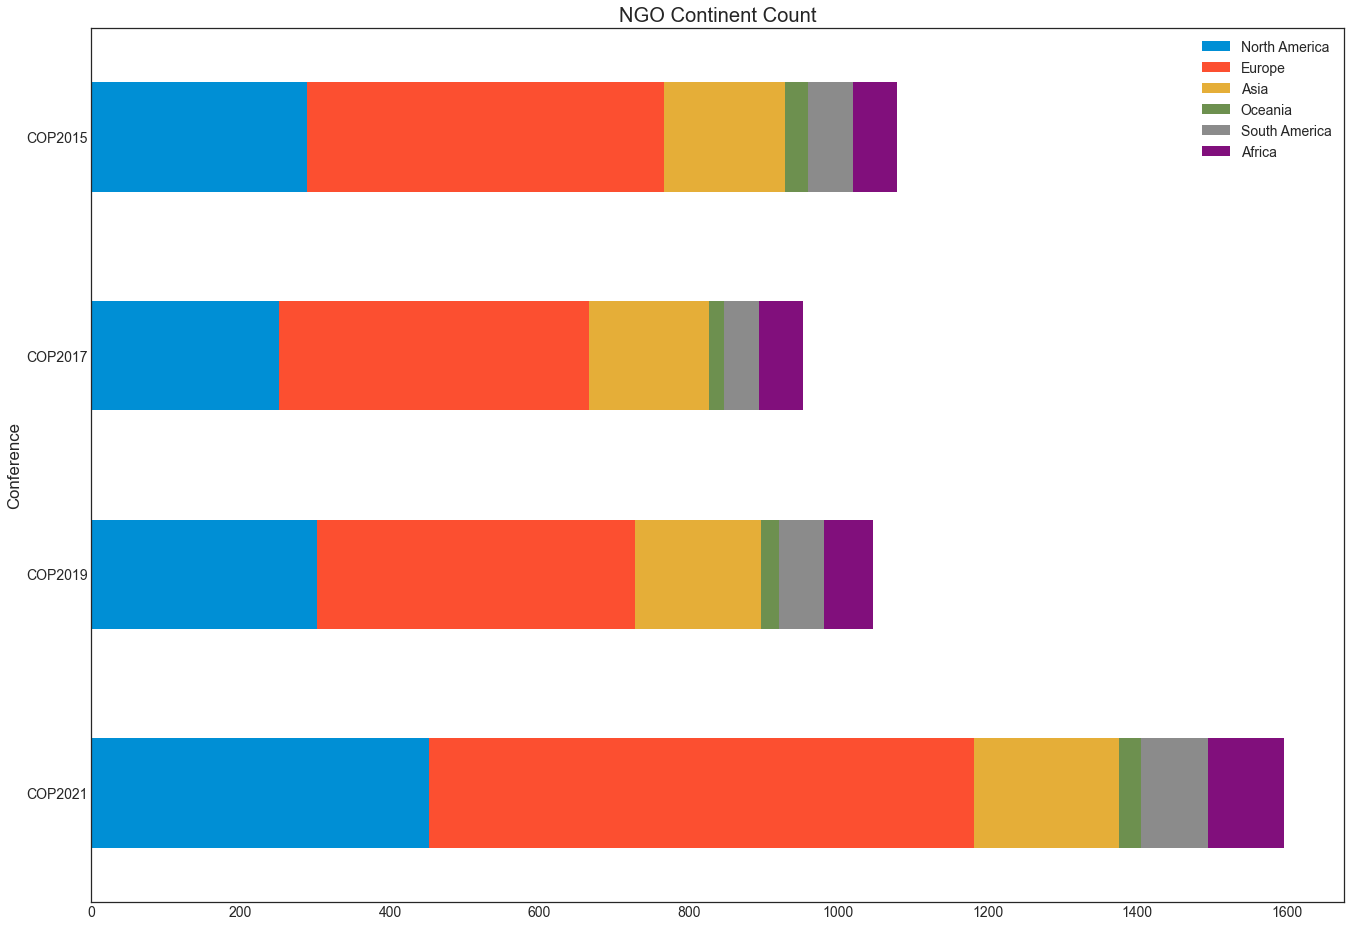

In [100]:
plt.style.use('seaborn-white')
ax = ngo_cont_breakdown.plot(x='Conference',
        kind='barh',
        stacked=True,
        title='NGO Continent Count', figsize = (20,15))
plt.gca().invert_yaxis()
plt.savefig('NGO_continent_barh2.png', facecolor = "white", dpi = 350)

## IGOs

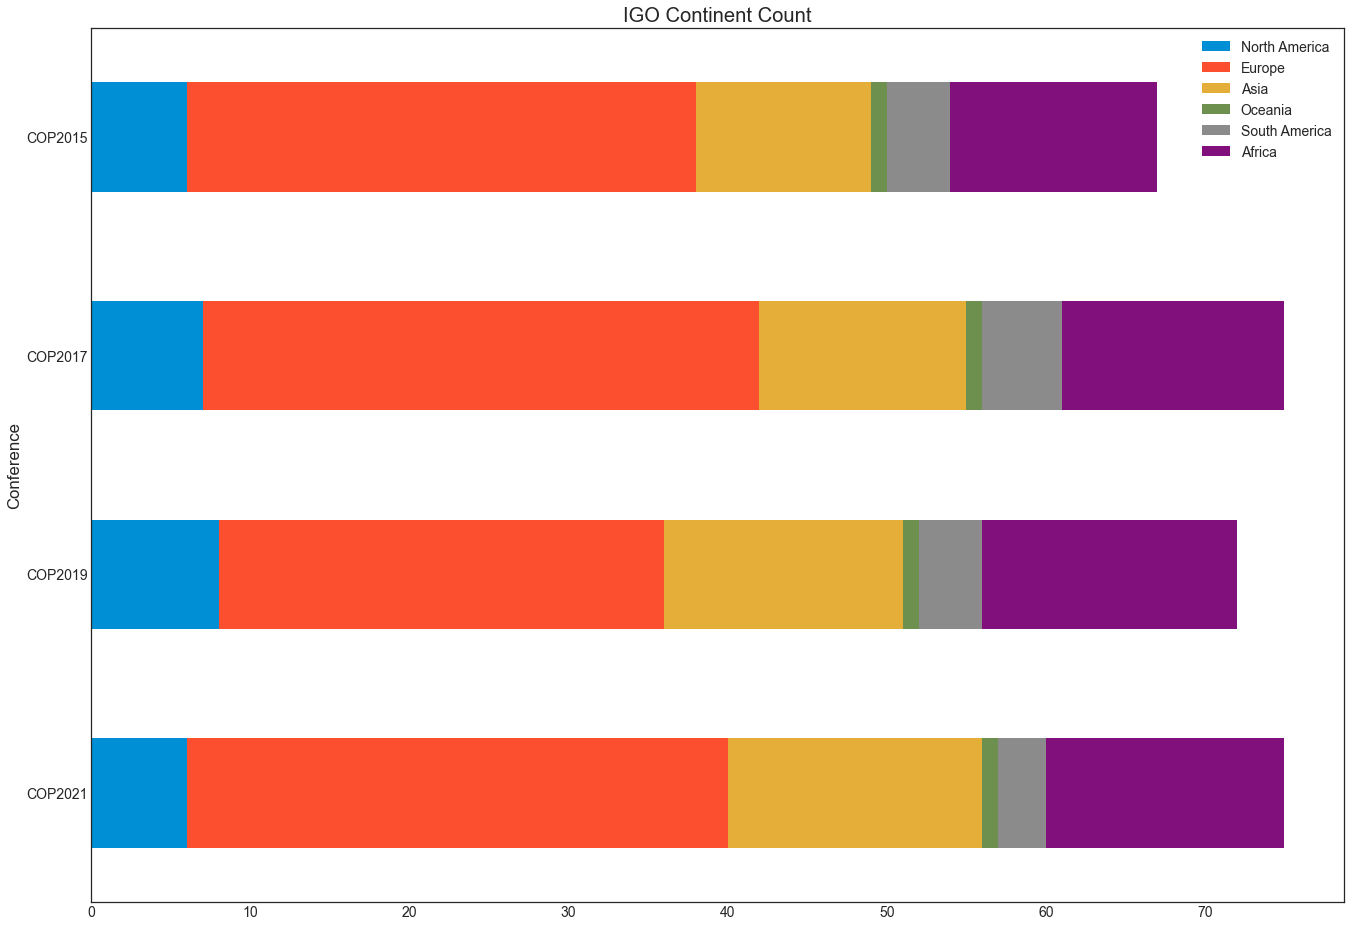

In [196]:
ax = igo_cont_breakdown.plot(x='Conference',
        kind='barh',
        stacked=True,
        title='IGO Continent Count', figsize = (20,15))
plt.gca().invert_yaxis()
plt.savefig('IGO_continent_barh2.png', facecolor = "white", dpi = 350)

## Country Data

### NGOs

In [105]:
NGO_country_2015 = pd.read_csv("2015_NGO_country_stats.csv", index_col=0)
NGO_country_2017 = pd.read_csv("2017_NGO_country_stats.csv", index_col=0)
NGO_country_2019 = pd.read_csv("2019_NGO_country_stats.csv", index_col=0)
NGO_country_2021 = pd.read_csv("2021_NGO_country_stats.csv", index_col=0)

In [106]:
NGO_country_2015

,Country,Count,ISO3,Continent,Income_Group
0,United States of America,228,USA,North America,High income
1,France,104,FRA,Europe,High income
2,United Kingdom of Great Britain and Northern I...,92,GBR,Europe,High income
3,Germany,74,DEU,Europe,High income
4,Belgium,40,BEL,Europe,High income
...,...,...,...,...,...
77,El Salvador,1,SLV,North America,Lower middle income
78,Congo,1,COG,Africa,Lower middle income
79,Benin,1,BEN,Africa,Lower middle income
80,Angola,1,AGO,Africa,Lower middle income


In [160]:
sb1 = px.sunburst(NGO_country_2015, path=['Continent', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  title = "Sunburst Plot of NGO Organization Count by Country (COP2015)")

sb2 = px.sunburst(NGO_country_2017, path=['Continent', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  title = "Sunburst Plot of NGO Organization Count by Country (COP2017)")

sb3 = px.sunburst(NGO_country_2019, path=['Continent', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  title = "Sunburst Plot of NGO Organization Count by Country (COP2019)")
sb4 = px.sunburst(NGO_country_2021, path=['Continent', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  title = "Sunburst Plot of NGO Organization Count by Country (COP2021)")

fig = make_subplots(rows=2, 
                    cols=2,
                    vertical_spacing=0.06,
                    subplot_titles=("COP2015", "COP2017", "COP2019", "COP2021"),
                    specs=[[{"type": "sunburst"}, {"type": "sunburst"}], [{"type": "sunburst"}, {"type": "sunburst"}]]
                    )
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)

fig.update_layout(coloraxis=dict(colorscale='blues'), 
                  height = 1000, 
                 title = "Sunburst Plot of NGO Organization Count by Country",
                 title_x = 0.5,
                 coloraxis_colorbar_title='Count')

In [170]:
# fig.write_image("img1.png", scale = 1.2, engine = 'kaleido')

In [ ]:
fig.write_html("sunburst_consolidated_1.html")

In [178]:
L = [NGO_country_2015, NGO_country_2017, NGO_country_2019, NGO_country_2021]

for df in L:
    df = df.dropna(axis=0, how="any", subset=["Income_Group"], inplace=True)

In [179]:
NGO_country_2015[NGO_country_2015.Income_Group.isna()]

,Country,Count,ISO3,Continent,Income_Group


In [180]:
sb1 = px.sunburst(NGO_country_2015, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb2 = px.sunburst(NGO_country_2017, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb3 = px.sunburst(NGO_country_2019, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb4 = px.sunburst(NGO_country_2021, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

fig = make_subplots(rows=2, 
                    cols=2,
                    vertical_spacing=0.06,
                    subplot_titles=("COP2015", "COP2017", "COP2019", "COP2021"),
                    specs=[[{"type": "sunburst"}, {"type": "sunburst"}], [{"type": "sunburst"}, {"type": "sunburst"}]]
                    )
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)

fig.update_layout(coloraxis=dict(colorscale='greens'), 
                  height = 1000, 
                 title = "Sunburst Plot of NGO Organization Count by Income Group and Country",
                 title_x = 0.5,
                 coloraxis_colorbar_title='Count')

In [181]:
fig.write_html("sunburst_consolidated_2.html")

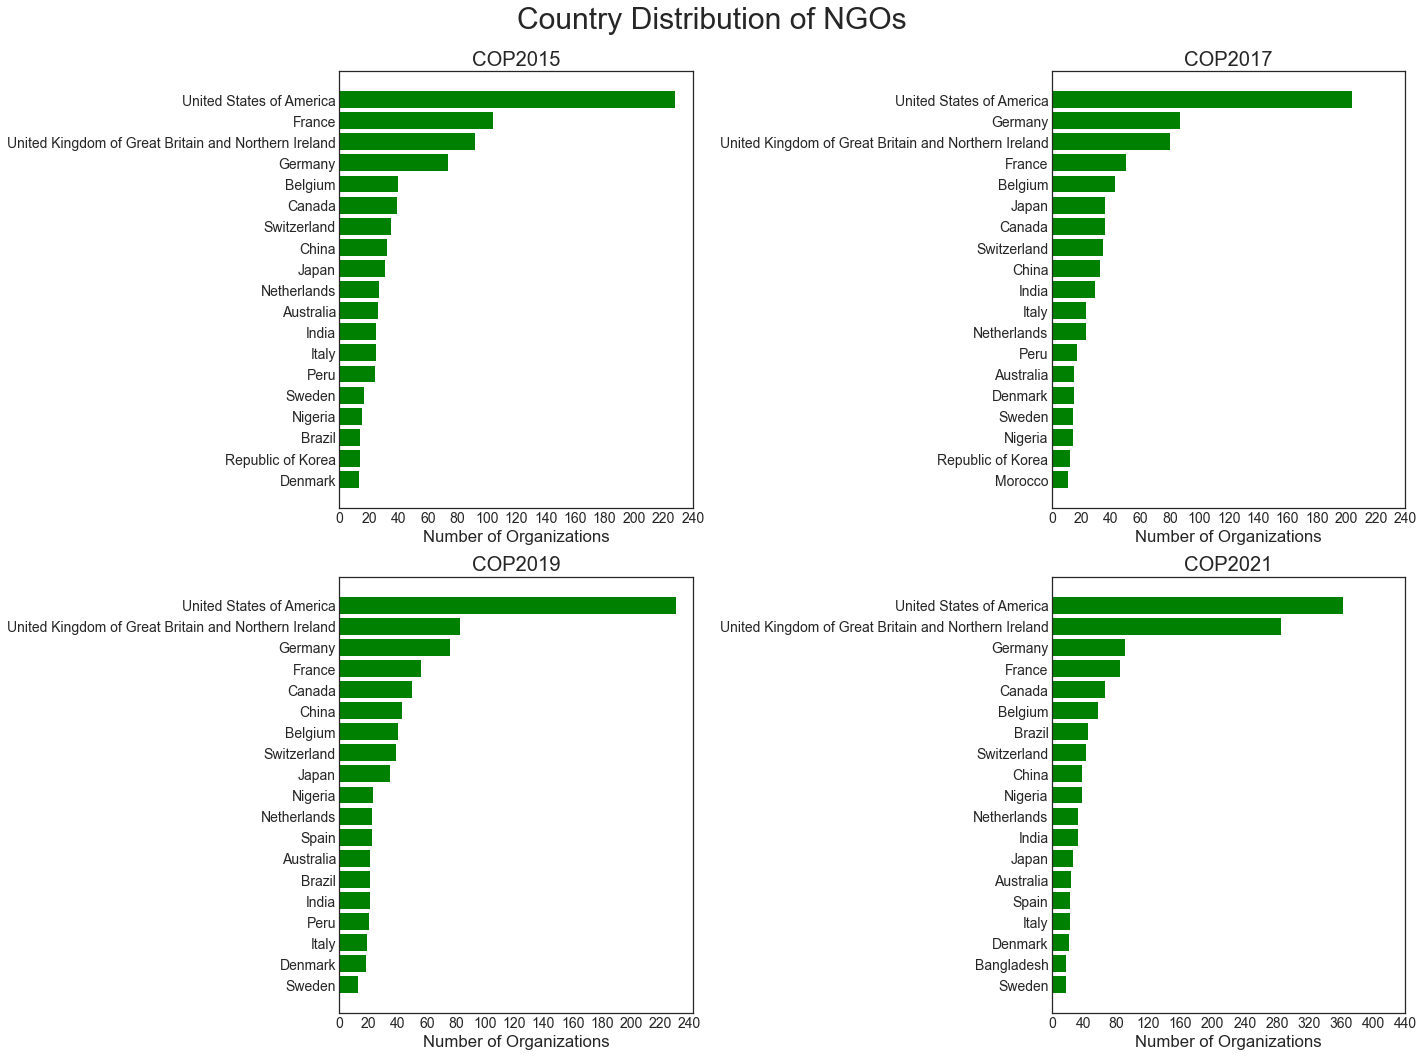

In [190]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
plt.gca().invert_yaxis()
plt.barh(NGO_country_2015.Country[0:19], 
         NGO_country_2015.Count[0:19], 
         color = ["green"])
plt.title("COP2015")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 250, 20))

plt.subplot(2, 2, 2)
plt.gca().invert_yaxis()
plt.barh(NGO_country_2017.Country[0:19], 
         NGO_country_2017.Count[0:19], 
         color = ["green"])
plt.title("COP2017")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 250, 20))

plt.subplot(2, 2, 3)
plt.gca().invert_yaxis()
plt.barh(NGO_country_2019.Country[0:19], 
         NGO_country_2019.Count[0:19], 
         color = ["green"])
plt.title("COP2019")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 250, 20))

plt.subplot(2, 2, 4)
plt.gca().invert_yaxis()
plt.barh(NGO_country_2021.Country[0:19], 
         NGO_country_2021.Count[0:19], 
         color = ["green"])
plt.title("COP2021")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 450, 40))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Country Distribution of NGOs', fontsize=30)
plt.savefig("NGO_country_barh_country.png", facecolor = "white", dpi = 350)

### IGOs

In [197]:
IGO_country_2015 = pd.read_csv("2015_IGO_country_stats.csv", index_col=0)
IGO_country_2017 = pd.read_csv("2017_IGO_country_stats.csv", index_col=0)
IGO_country_2019 = pd.read_csv("2019_IGO_country_stats.csv", index_col=0)
IGO_country_2021 = pd.read_csv("2021_IGO_country_stats.csv", index_col=0)

In [199]:
IGO_country_2015.head(14)

,Country,Count,ISO3,Continent,Income_Group
0,Switzerland,6,CHE,Europe,High income
1,France,6,FRA,Europe,High income
2,Finland,4,FIN,Europe,High income
3,United Kingdom of Great Britain and Northern I...,4,GBR,Europe,High income
4,Austria,3,AUT,Europe,High income
5,Burkina Faso,2,BFA,Africa,Low income
6,Indonesia,2,IDN,Asia,Lower middle income
7,Netherlands,2,NLD,Europe,High income
8,Tunisia,2,TUN,Africa,Lower middle income
9,United States of America,2,USA,North America,High income


In [200]:
sb1 = px.sunburst(IGO_country_2015, 
                  path=['Continent', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb2 = px.sunburst(IGO_country_2017, 
                  path=['Continent', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb3 = px.sunburst(IGO_country_2019, 
                  path=['Continent', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb4 = px.sunburst(IGO_country_2021, 
                  path=['Continent', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

fig = make_subplots(rows=2, 
                    cols=2,
                    vertical_spacing=0.06,
                    subplot_titles=("COP2015", "COP2017", "COP2019", "COP2021"),
                    specs=[[{"type": "sunburst"}, {"type": "sunburst"}], [{"type": "sunburst"}, {"type": "sunburst"}]]
                    )
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)

fig.update_layout(coloraxis=dict(colorscale='blues'), 
                  height = 1000, 
                 title = "Sunburst Plot of IGO Organization Count by Country",
                 title_x = 0.5,
                 coloraxis_colorbar_title='Count')

In [201]:
fig.write_html("sunburst_consolidated_3.html")

In [203]:
L = [IGO_country_2015, IGO_country_2017, IGO_country_2019, IGO_country_2021]

for df in L:
    df = df.dropna(axis=0, how="any", subset=["Income_Group"], inplace=True)

In [204]:
sb1 = px.sunburst(IGO_country_2015, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb2 = px.sunburst(IGO_country_2017, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb3 = px.sunburst(IGO_country_2019, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

sb4 = px.sunburst(IGO_country_2021, 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', 
                  hover_data=['ISO3'])

fig = make_subplots(rows=2, 
                    cols=2,
                    vertical_spacing=0.06,
                    subplot_titles=("COP2015", "COP2017", "COP2019", "COP2021"),
                    specs=[[{"type": "sunburst"}, {"type": "sunburst"}], [{"type": "sunburst"}, {"type": "sunburst"}]]
                    )
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)

fig.update_layout(coloraxis=dict(colorscale='greens'), 
                  height = 1000, 
                 title = "Sunburst Plot of IGO Organization Count by Income Group and Country",
                 title_x = 0.5,
                 coloraxis_colorbar_title='Count')

In [205]:
fig.write_html("sunburst_consolidated_4.html")

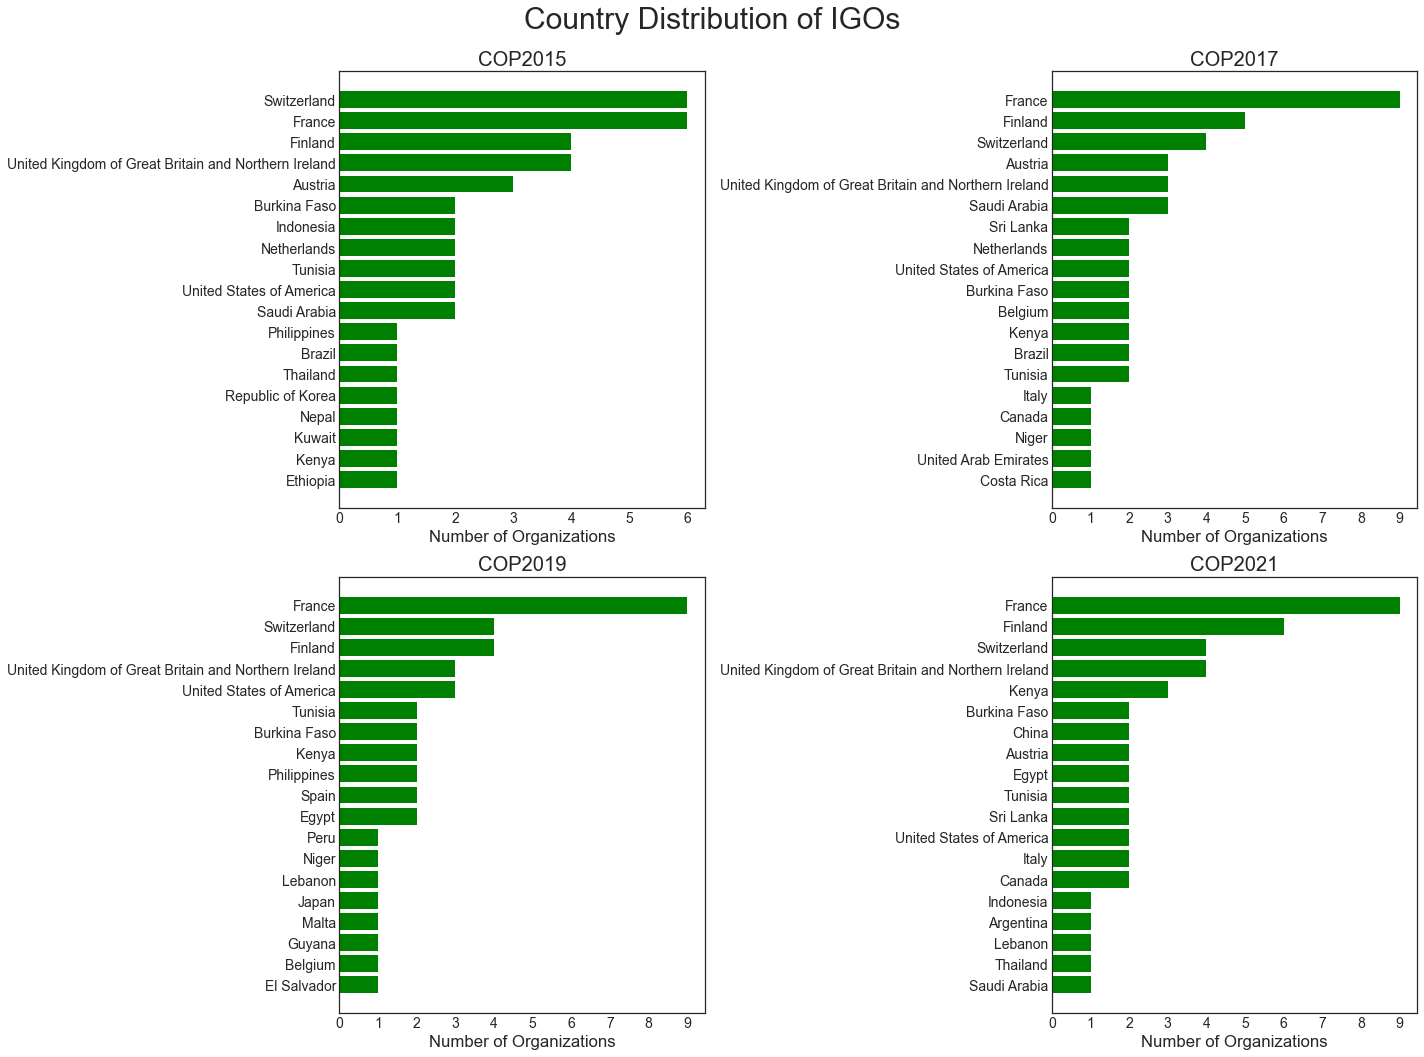

In [209]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
plt.gca().invert_yaxis()
plt.barh(IGO_country_2015.Country[0:19], 
         IGO_country_2015.Count[0:19], 
         color = ["green"])
plt.title("COP2015")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 7, 1))

plt.subplot(2, 2, 2)
plt.gca().invert_yaxis()
plt.barh(IGO_country_2017.Country[0:19], 
         IGO_country_2017.Count[0:19], 
         color = ["green"])
plt.title("COP2017")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 10, 1))

plt.subplot(2, 2, 3)
plt.gca().invert_yaxis()
plt.barh(IGO_country_2019.Country[0:19], 
         IGO_country_2019.Count[0:19], 
         color = ["green"])
plt.title("COP2019")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 10, 1))

plt.subplot(2, 2, 4)
plt.gca().invert_yaxis()
plt.barh(IGO_country_2021.Country[0:19], 
         IGO_country_2021.Count[0:19], 
         color = ["green"])
plt.title("COP2021")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 10, 1))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Country Distribution of IGOs', fontsize=30)
plt.savefig("IGO_country_barh_country.png", facecolor = "white", dpi = 350)